In [28]:
from utils import (
    cost_function,
    find_best_individual,
    roulette_reproduction,
    one_point_crossover,
    gauss_mutation,
    init_population,
    cube_constrains,
    roulette_reproduction_weak,
)
from algorithm import evolution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
population = init_population(cube_constrains, 100)
point, cost, history = evolution(cost_function, roulette_reproduction, population, .1, 0.8, 500)
print(point, cost)

[1.00678436 0.99317212] 21.564860779644754


## roulette reproduction: traditional vs min max
traditional - formula from lecture's notes
min max - applied min max scaler - described in roulette_reproduction in utils.py

In [16]:
# data preparation
min_max_best_costs = []
for _ in range(20):
    population = init_population(cube_constrains, 100)
    point, cost, history = evolution(cost_function, roulette_reproduction, population, .1, 0.8, 500)
    min_max_best_costs.append(cost)
min_max_best_costs_np = np.array(min_max_best_costs)
min_max_median = np.median(min_max_best_costs)

traditional_best_costs = []
for _ in range(20):
    population = init_population(cube_constrains, 100)
    point, cost, history = evolution(cost_function, roulette_reproduction_weak, population, .1, 0.8, 500)
    traditional_best_costs.append(cost)
traditional_best_costs_np = np.array(traditional_best_costs)
traditional_median = np.median(traditional_best_costs)

print(f"min max median: {min_max_median}\n traditional median: {traditional_median}")

min max median: 21.47199968905407
 traditional median: 27.926261203644945


Text(0, 0.5, 'cost')

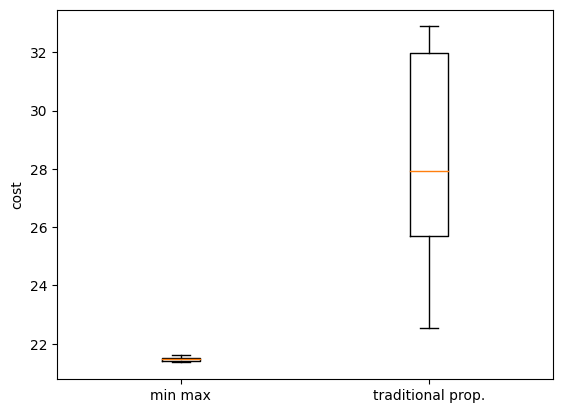

In [50]:
# plotting
fig, ax = plt.subplots()
ax.boxplot([min_max_best_costs_np, traditional_best_costs_np])
plt.xticks([1, 2], ["min max", "traditional prop."])
plt.ylabel("cost")

In [65]:
traditional_histories = []
min_max_histories = []
for _ in range(10):
    population = init_population(cube_constrains, 100)
    _, _, traditional_history = evolution(cost_function, roulette_reproduction_weak, population, .1, 0.8, 500)
    _, _, min_max_history = evolution(cost_function, roulette_reproduction, population, .1, 0.8, 500)
    traditional_histories.append(traditional_history)
    min_max_histories.append(min_max_history)

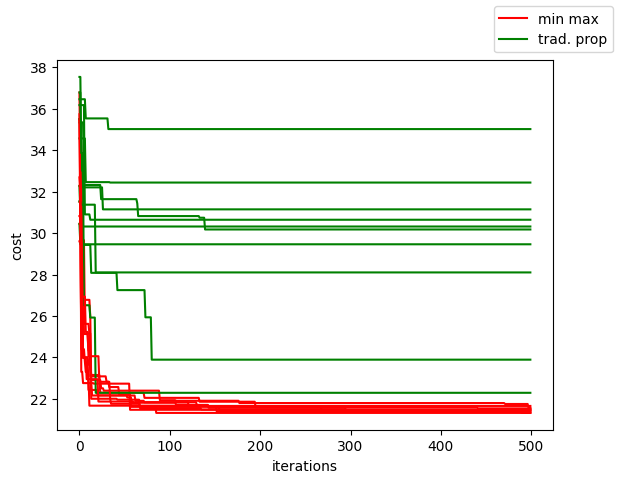

In [66]:
fig, ax = plt.subplots()
for min_max, traditional in zip(min_max_histories, traditional_histories):
    ax.plot(min_max, "r")
    ax.plot(traditional, "g")
ax.set_xlabel("iterations")
ax.set_ylabel("cost")
fig.legend(["min max", "trad. prop"])

#### conclusion
Pluging in min max scaler into roulette reproduction stresses difference between individuals, results are really significant

## mutation strength

In [136]:
coefficients_histories = []
costs =[]
coefficients = [0.001, 0.01, 0.1, 0.4, 0.6, 0.8, 1.2, 1.6]
population = init_population(cube_constrains, 100)
for coef in coefficients:
    coef_histories = []
    for _ in range(1):
        _, cost, history = evolution(cost_function, roulette_reproduction, population, coef, 0.8, 500)
        coef_histories.append(history)
        costs.append(cost)
    coefficients_histories.append(coef_histories)

In [122]:
print(costs)

[21.264498314875826, 21.291881201419024, 21.49016975054211, 22.56535322047729, 22.350170941504953, 22.377487260334618, 30.866570749481866, 27.385903724439302]


Text(0, 0.5, 'cost')

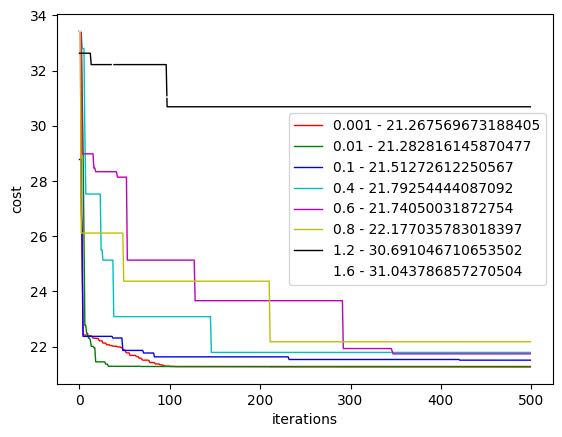

In [138]:
fig, ax = plt.subplots()
from cycler import cycler

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'])))
for index, coef_histories in enumerate(coefficients_histories):
    for coef_history in coef_histories:
        ax.plot(coef_history, linewidth="1", label=f"{coefficients[index]} - {costs[index]}")
plt.legend()
ax.set_xlabel("iterations")
ax.set_ylabel("cost")

#### conclusions
need to focus on smaller coefficients

In [151]:
coefficients_histories = []
costs = []
coefficients = [0.001, 0.005, 0.01, 0.1]
population = init_population(cube_constrains, 100)
for coef in coefficients:
    coef_histories = []
    for _ in range(3):
        _, cost, history = evolution(cost_function, roulette_reproduction, population, coef, 0.8, 100)
        coef_histories.append(history)
        costs.append(cost)
    coefficients_histories.append(coef_histories)

Text(0, 0.5, 'cost')

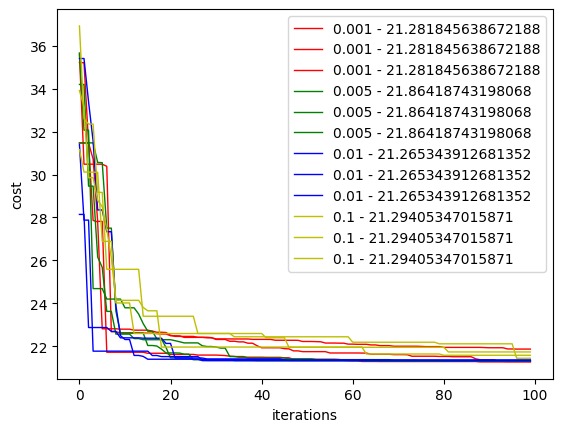

In [153]:
fig, ax = plt.subplots()
from cycler import cycler

# plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
colors = ['r', 'g', 'b', 'y']
for index, coef_histories in enumerate(coefficients_histories):
    for coef_history in coef_histories:
        ax.plot(coef_history, color=colors[index], linewidth="1", label=f"{coefficients[index]} - {costs[index]}")
plt.legend()
ax.set_xlabel("iterations")
ax.set_ylabel("cost")

In [ ]:
"""
add
- 0.2
- plot titles
- change Sequence to float list / tuple
"""

## population size
population size is very important in comparison to other hyperparams

In [154]:
populations_histories = []
costs = []
populations = [20, 100, 200]
population = init_population(cube_constrains, 100)
for pop in populations:
    pop_histories = []
    for _ in range(3):
        _, cost, history = evolution(cost_function, roulette_reproduction, population, 0.01, 0.8, pop)
        pop_histories.append(history)
        costs.append(cost)
    populations_histories.append(pop_histories)

Text(0, 0.5, 'cost')

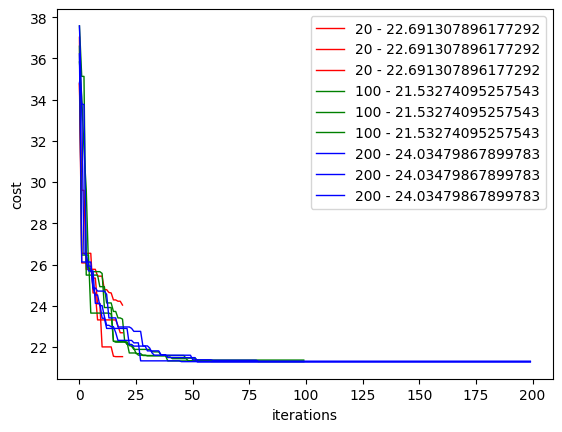

In [157]:
fig, ax = plt.subplots()
from cycler import cycler

# plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
colors = ['r', 'g', 'b']
for index, pop_histories in enumerate(populations_histories):
    for pop_history in pop_histories:
        ax.plot(pop_history, color=colors[index], linewidth="1", label=f"{populations[index]} - {costs[index]}")
plt.legend()
ax.set_xlabel("iterations")
ax.set_ylabel("cost")